In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
Hypertension_df = pd.read_csv(r"..\DataSet\Hypertension.csv")
Hypertension_df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


In [33]:
Hypertension_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [34]:
Hypertension_df.tail()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1
4239,0,39,1,30.0,0.0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [35]:
Hypertension_df.shape

(4240, 13)

In [36]:
Hypertension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [37]:
Hypertension_df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

In [38]:
Hypertension_df=Hypertension_df.dropna()

In [39]:
Hypertension_df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.311917
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.463338
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


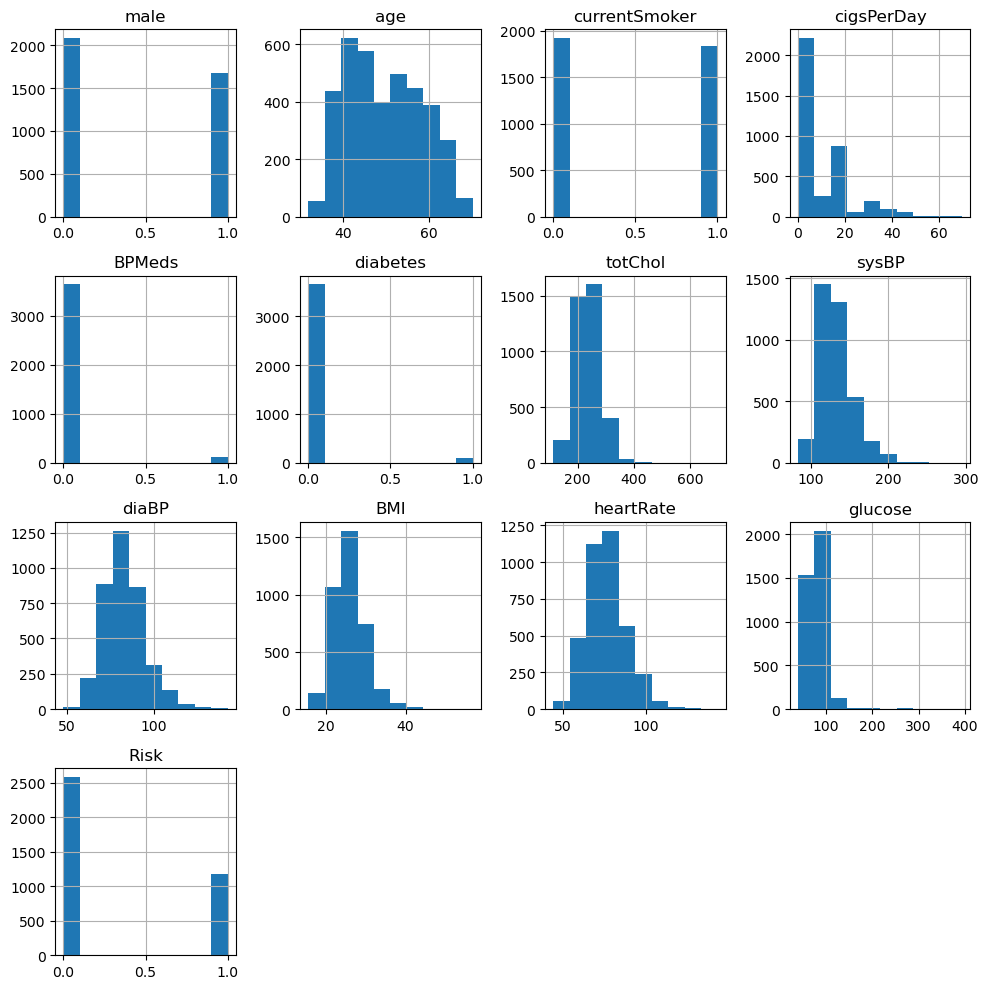

In [40]:
# Plot histograms for all variables
Hypertension_df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

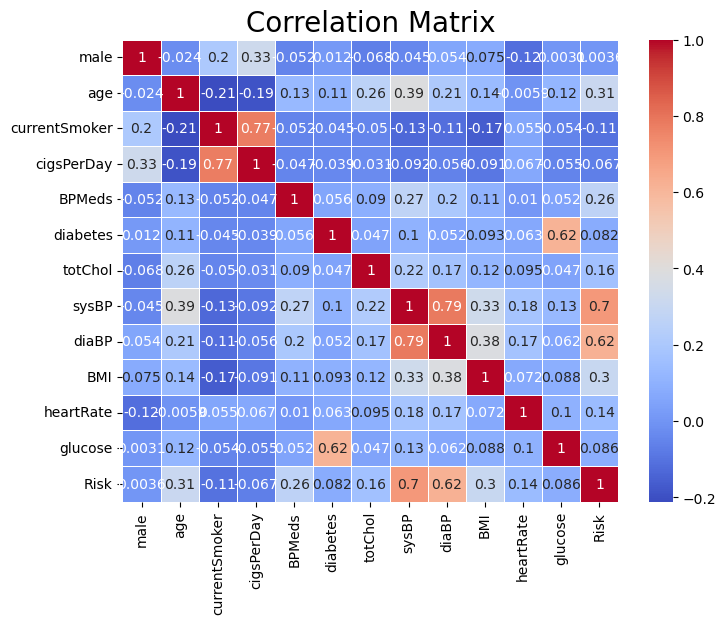

In [41]:
# Correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = Hypertension_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [42]:

# checking the distribution of Target Variable
Hypertension_df['Risk'].value_counts()

Risk
0    2581
1    1170
Name: count, dtype: int64

In [43]:
#Splitting the Features and Target
x = Hypertension_df.drop(columns='Risk', axis=1)
y = Hypertension_df['Risk']

In [44]:
# Function to remove outliers using IQR
def remove_outliers_iqr(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
# Remove outliers from features
X_iqr = remove_outliers_iqr(x)

In [46]:
# Align y with the reduced X_iqr dataset
y_aligned = y[X_iqr.index]

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_iqr, y_aligned, test_size=0.3, random_state=42)

In [48]:
# print shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (2233, 12)
Testing Features Shape: (957, 12)
Training Target Shape: (2233,)
Testing Target Shape: (957,)


In [49]:
Hypertension_model = RandomForestClassifier()

In [50]:
Hypertension_model.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# accuracy on training data
X_train_prediction = diabetes_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [52]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Hypertension_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
import pickle
# Save the model
filename = 'Hypertension_risk_model.sav'
pickle.dump(diabetes_model, open(filename, 'wb'))

# Load the model
Hypertension_risk_model = pickle.load(open(filename, 'rb'))